# Cupoy官網新聞

## TARGET 1 
> 透過開發者⼯工具觀察網站在列列出 News Feed 這邊是屬於動態網站還是靜態網站，或是有 API 可以直接送 requests
## TARGET 2 
> 根據網站特性選擇 requests / BeautifulSoup / selenium 等⼯工具進⾏行行爬蟲整理理
## TARGET 3 
> 整理理成 pandas.DataFrame 後做簡單的統計可以⽤用 matplotlib.pyplot 或是pandas 內建的 function 畫圖 (histogram / pie chart ...)

In [1]:
import requests
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

### 以科技新聞為例，先連結到科技新聞網頁，複製其URL。

In [2]:
Cupoy_url = "https://www.cupoy.com/newsfeed/topicgrp/tech_tw"  #科技新聞

### 用Selenium打開一個瀏覽器，連結到網站。然後模擬下拉網頁的動作，讓網頁完成更新，再處理後續動作。

In [3]:
browser = webdriver.Chrome()
browser.get(Cupoy_url)  # 打開瀏覽器並連到 Cupoy科技 網頁
time.sleep(5)

#
# 以下是用Selenium模擬下拉網頁動作，讓網頁更新
#
count = 1
max_count = 500
categorylist = []
titlelist = []
contentlist = []
hreflist = []
while (count <= max_count) :
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, "html5lib")
    
    for artical in soup.find_all('div', class_ = "sc-eEieub sc-iuDHTM ibJqYc"):
        
        # 將文章標題、文章內容、文章來源、文章網址抓下來
        category = artical.find('div', class_ = "sc-gacfCG bPSpUf").text
        title = artical.find('h6', class_ = 'sc-erNlkL sc-ekulBa hDLssh').text
        content = artical.find('p', class_ = 'sc-FQuPU sc-ciodno bvnzOw').text
        href = artical.find("a").get('href')
        
        # 防止爬到重複的文章
        if title not in titlelist:
            # 將各資料存進list以供後續分析
            categorylist.append(category)
            titlelist.append(title)
            contentlist.append(content)
            hreflist.append(href)
            # count表文章爬到的數目
            count += 1
        
        # 停止條件，抓到500篇文章即終止程式
        if count == (max_count + 1):
            break
    
    # 將網頁繼續向下滑
    time.sleep(1)
    browser.execute_script("window.scrollTo(0, 1000000);")
browser.close()

In [4]:
# 整理資料後顯示
from pandas import DataFrame
columnName = ['category','title','content','href']

data = DataFrame([categorylist, titlelist, contentlist, hreflist])
data = data.T
data.columns = columnName
data

,category,title,content,href
0,AI與大數據,2020年搞深度學習需要什麼樣的GPU：請上48G顯存 | 機器之心,2020 年，什麼樣的 GPU 才是人工智能訓練的最佳選擇？本文給出的結論似乎告訴我們，開發...,https://www.jiqizhixin.com/articles/2020-02-19-9
1,AI與大數據,Excel狂魔？單元格做計算機視覺：人臉檢測、OCR都不在話下 | 機器之心,Excel，你還有多少驚喜是朕不知道的？,https://www.jiqizhixin.com/articles/2020-02-19-8
2,AI與大數據,只需一行代碼，你的純文本秒變Markdown | 機器之心,只要你有純文本編輯器，加上一條語句，瞬間它就可以成爲 Markdown 編輯器。,https://www.jiqizhixin.com/articles/2020-02-19-7
3,電子商務,新電子郵件勒索手法，不付錢就讓你網站廣告被Google封鎖 | iThome,KrebsOnSecurity提醒近期或有新一波電子郵件勒索事件發生，瞄準的對象是使用Goo...,https://www.ithome.com.tw/news/135892
4,AI與大數據,2020程序員技能展望：平均年薪5.4萬美元，僱主最看重JavaScript，小公司青睞全才...,這是該公司有史以來規模最大的調查，要求受訪者提供有關編碼訓練營、薪酬公平等方面的投入。,https://www.jiqizhixin.com/articles/2020-02-19-6
5,AI與大數據,完全使用憶阻器實現CNN，清華大學微電子所新研究登上Nature | 機器之心,完全用硬件實現的CNN，清華微電子所新研究登上Nature，手寫數字識別準確率超96%。,https://www.jiqizhixin.com/articles/2020-02-19-5
6,Fintech金融科技,華為法律吃敗仗，法官：美國將有權制裁！ - INSIDE,"美國政府多管齊下，要阻止華為科技被用於美國或其他國家的敏感通訊設備之中。 標籤: 美國, 華...",https://www.inside.com.tw/article/18956-us-jud...
7,AI與大數據,AnalyticsZoo Cluster Serving自動擴展分佈式推理 | 機器之心,Analytics Zoo Cluster Serving 是一個輕量級、分佈式、實時的模型...,https://www.jiqizhixin.com/articles/2020-02-19
8,Fintech金融科技,馬斯克不開心！比爾蓋茲人生第一臺電動車選保時捷 - INSIDE,"馬斯克還對此回應了... 標籤: 比爾蓋茲, 馬斯克, 保時捷",https://www.inside.com.tw/article/18958-bill-g...
9,資訊安全,全球常見爛密碼榜單公開！123456、11111、iloveyou 上榜，真的要改掉！ | ...,工程師公佈使用者最愛使用的密碼，你的密碼是否也在榜單中呢？你的密碼到底是不是安全的呢？,https://www.managertoday.com.tw/eightylife/art...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
0    32 non-null object
1    32 non-null int64
dtypes: int64(1), object(1)
memory usage: 592.0+ bytes
None


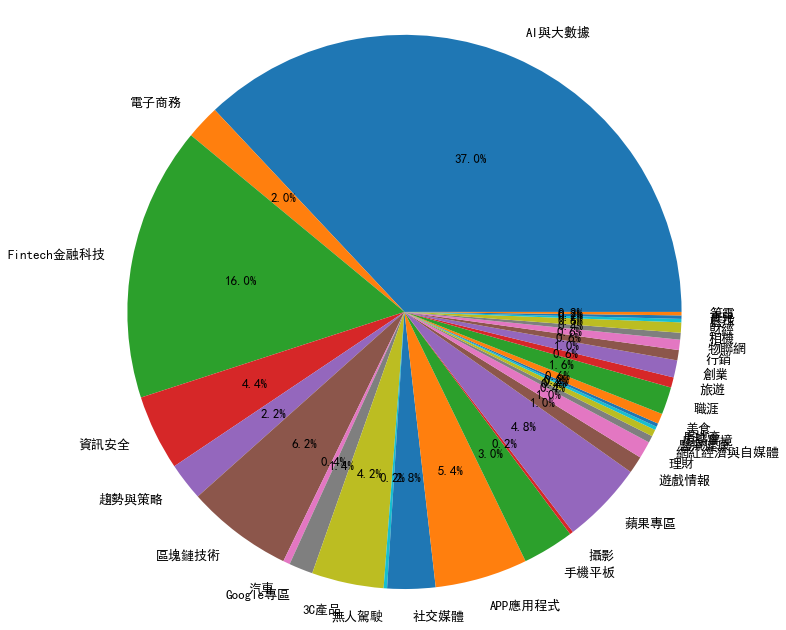

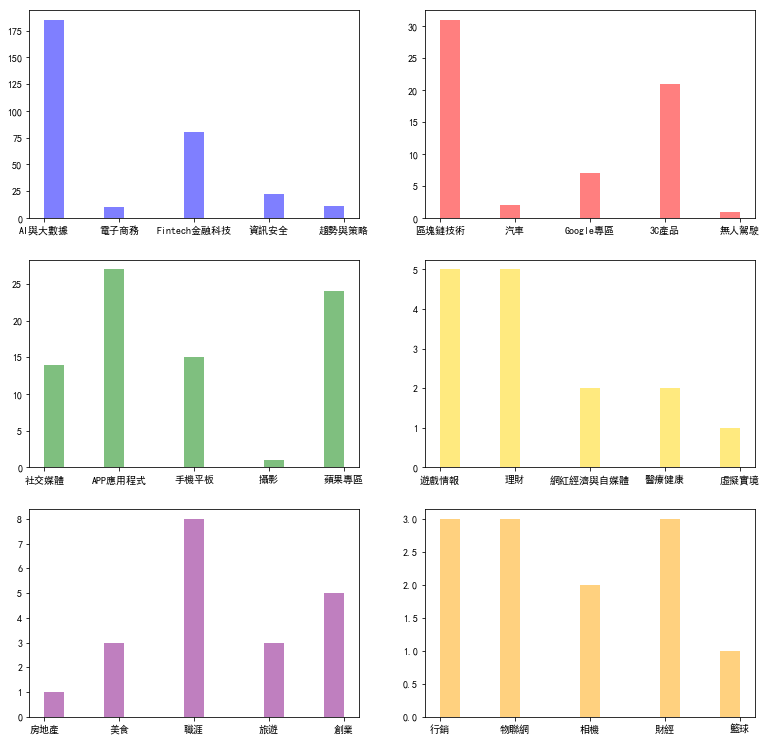

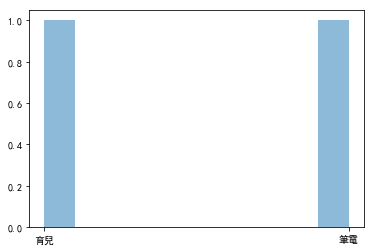

In [9]:
# 用Counter計算種類後排序顯示
from collections import Counter
import matplotlib.pyplot as plt

sourceDict = dict(Counter(categorylist))
categoryDf = DataFrame(list(sourceDict.items()))
print(categoryDf.info())

# 解決圖形的中文顯示問題
plt.rcParams['font.sans-serif'] = ['SimHei'] # 替換sans-serif字型
plt.rcParams['axes.unicode_minus'] = False   # 解決座標軸負數的負號顯示問題

# 繪出圓餅圖
plt.figure(figsize=(11,11)) # 顯示圖框架大小
#plt.title('新聞種類分布', fontsize = '25')
labels = categoryDf[0]          # 製作圓餅圖的類別標籤
size = categoryDf[1]            # 製作圓餅圖的數值來源
patches,l_text,p_text = plt.pie(size, labels=labels, autopct = '%1.1f%%')
# 調整字體
for t in l_text:
    t.set_size(13)
for t in p_text:
    t.set_size(13)
plt.axis('equal')
plt.show()

histshow_num = 5
histfigure_num_x = 3
histfigure_num_y = 2
# 繪出長條圖
count = 1
color = ['blue', 'red', 'green', 'gold', 'purple', 
         'orange', 'm', 'teal', 'rosybrown', 'olive', 
         'c', 'navy', 'thistle', 'palegreen', 'pink', 'turquoise'
         'y', 'chocolate', 'grey', 'crimson', 'darkcyan']
plotlist = []
plt.figure(figsize = (13,int(len(categoryDf)/2)-histfigure_num_x))
for key, value in sourceDict.items():
    for i in range(value):
        plotlist.append(key)
    # 每五個種類就畫一張長條圖
    if count % histshow_num == 0:
        plt.subplot(histfigure_num_x, histfigure_num_y, int(count/histshow_num))
        plt.hist(plotlist, alpha=0.5, bins = 15, color=color[int(count/histshow_num-1)])
        plotlist = []
    count += 1
plt.show()
plt.hist(plotlist, alpha=0.5)
plt.show()

In [6]:
from jieba import cut
from snownlp import SnowNLP

# 準備標題語料
titleCorpus = ''
for title in titlelist:
    titleCorpus += title 

# 準備內容語料 
contentCorpus = ''
for content in contentlist:
    contentCorpus += content  

#停用詞設定
with open('stopWords.txt', 'r', encoding="utf-8") as f:
    stops = f.read().split('\n')

# 對titleCorpus進行斷詞
term_titleCorpus = []
for word in cut(titleCorpus):
    if word not in stops:
        term_titleCorpus.append(word)
titleCount = dict(Counter(term_titleCorpus))

# 對contentCorpus進行斷詞
term_contentCorpus = []
for word in cut(contentCorpus):
    if word not in stops:
        term_contentCorpus.append(word)
contentCount = dict(Counter(term_contentCorpus))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.607 seconds.
Prefix dict has been built successfully.


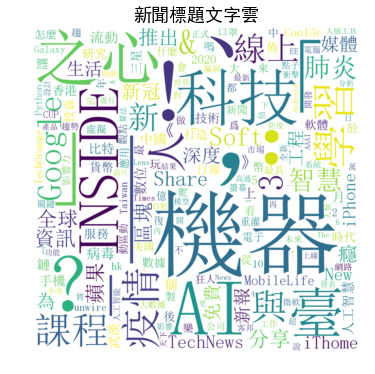

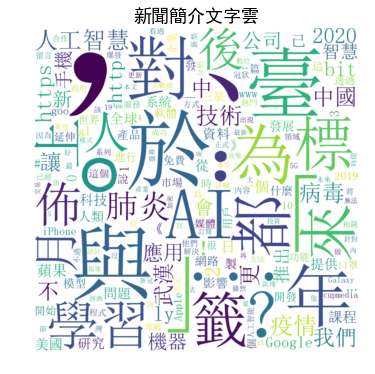

In [7]:
from wordcloud import WordCloud

# 字體路徑設定
font = "C:\\Windows\\Fonts\\simsun.ttc"

# 標題文字雲繪圖
title_wordcloud = WordCloud(background_color="white",font_path = font, collocations=False, width=1200, height=1200, margin=2)  
title_wordcloud.generate_from_frequencies(frequencies = titleCount)
plt.figure(figsize=(5,5))
plt.title('新聞標題文字雲', fontsize = '18')
plt.imshow(title_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 內容文字雲繪圖
content_wordcloud = WordCloud(background_color="white",font_path = font, collocations=False, width=1200, height=1200, margin=2)  
content_wordcloud.generate_from_frequencies(frequencies = contentCount)
plt.figure(figsize=(5,5))
plt.title('新聞簡介文字雲', fontsize = '18')
plt.imshow(content_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [8]:
# 計算標題的情緒分數
title_emotionScore = 0
for title in titlelist:
    s = SnowNLP(title)
    title_emotionScore += s.sentiments
print('標題的情感分析平均分數：', round(title_emotionScore / max_count,3))

# 計算文章內容的情緒分數
content_emotionScore = 0
for content in contentlist:
    try:
        ss = SnowNLP(content)
        content_emotionScore += ss.sentiments
    except:
        continue
print('文章內容的情感分析平均分數：', round(content_emotionScore / max_count,3))

print('(該分數表示文章為正面的機率為多少)')

標題的情感分析平均分數： 0.525
文章內容的情感分析平均分數： 0.285
(該分數表示文章為正面的機率為多少)
